# Logistic Regression
- Classification problem: A doctor must be able to determine whether or not a patient will develop diabetes, on the basis of the patient's medical data (age, glucose, mass, ...)
- Logistic regression is used to model dichotomous outcome variables (healty/diabetic):
    P(diabetic | glucose, mass)
- The log odds of the outcome is modeled as a linear combination of the predictor variables:
    log(odds of being diabetic) = aX + b

# Loading data into R
- We will use the 'PimaIndiansDiabetes' dataset.

In [1]:
# Install the mlbench library
install.packages("mlbench")

# The mlbench package needs to be loaded to access our data 
# For a full list of these datasets, type library(help = "mlbench")
library(mlbench)
library(ggplot2) # for advanced plotting

# Load dataset
data(PimaIndiansDiabetes)

# This dispalys the first six rows
head(PimaIndiansDiabetes)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg


# Create a Validation Dataset
- We need to know if the model we create is any good.
- Hold back some data that the algorithm will not get to see.
- Later, use this data to validate the model.

In [2]:
set.seed(101) # Set Seed so that same sample can be reproduced in future also

# Select 80% of data as sample from total 'n' rows of the data  
nrow <- nrow(PimaIndiansDiabetes)
sample <- sample.int(n = nrow, size = floor(.80*nrow), replace = F)

# select 20% of the data for validation
validation  <- PimaIndiansDiabetes[-sample, ]

# use the remaining 80% of data to training the model
dataset <- PimaIndiansDiabetes[sample, ]
head(dataset)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
430,1,95,82,25,180,35.0,0.233,43,pos
95,2,142,82,18,64,24.7,0.761,21,neg
209,1,96,64,27,87,33.2,0.289,21,neg
442,2,83,66,23,50,32.2,0.497,22,neg
351,4,92,80,0,0,42.2,0.237,29,neg
315,7,109,80,31,0,35.9,1.127,43,pos


# Description of the Data
- Dimensions: 614 instances, 9 attributes
- Predictor variables: Numeric (pregnant, glucose, pressure, triceps, insulin, mass, pedigree, age).
- Response variable: Categorical, 2 class labels (neg = not diabetic / pos = diabetic)

In [3]:
# View structure of data
str(dataset)

# Summary statistics for the dataset
summary(dataset)

'data.frame':	614 obs. of  9 variables:
 $ pregnant: num  1 2 1 2 4 7 9 1 4 2 ...
 $ glucose : num  95 142 96 83 92 109 184 100 173 68 ...
 $ pressure: num  82 82 64 66 80 80 85 74 70 70 ...
 $ triceps : num  25 18 27 23 0 31 15 12 14 32 ...
 $ insulin : num  180 64 87 50 0 0 0 46 168 66 ...
 $ mass    : num  35 24.7 33.2 32.2 42.2 35.9 30 19.5 29.7 25 ...
 $ pedigree: num  0.233 0.761 0.289 0.497 0.237 ...
 $ age     : num  43 21 21 22 29 43 49 28 33 25 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 1 1 1 2 2 1 2 1 ...


    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.:100.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :118.0   Median : 72.00   Median :23.00  
 Mean   : 3.866   Mean   :121.4   Mean   : 68.59   Mean   :20.41  
 3rd Qu.: 6.000   3rd Qu.:140.0   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :15.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin            mass          pedigree           age        diabetes 
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0840   Min.   :21.00   neg:398  
 1st Qu.:  0.00   1st Qu.:27.02   1st Qu.:0.2380   1st Qu.:24.00   pos:216  
 Median : 20.00   Median :32.00   Median :0.3700   Median :29.00            
 Mean   : 78.81   Mean   :32.01   Mean   :0.4694   Mean   :33.33            
 3rd Qu.:127.75   3rd Qu.:36.58   3rd Qu.:0.6088   3rd Qu.:40.00            
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.00     

# Visualizing the Data

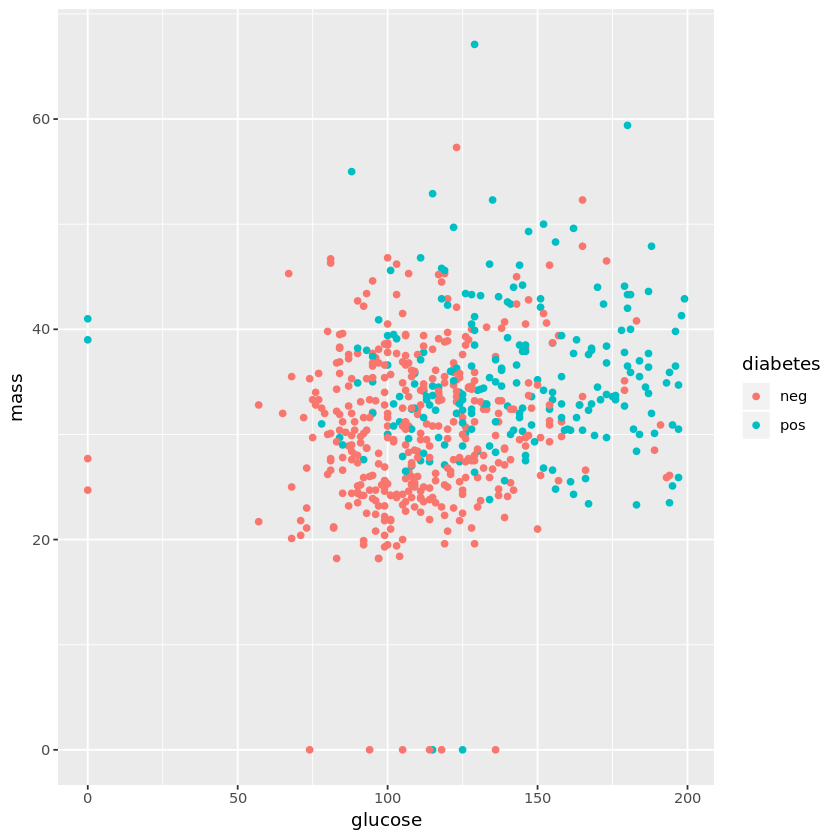

In [4]:
# Scatterplot of glucose vs. mass, controlling for diabetes
ggplot(data = dataset, aes(x = glucose, y = mass, color = diabetes)) + 
    geom_point()

# Using Logistic Regression Model
- Estimate a logistic regression model using the glm (generalized linear model) function.
- Coefficients: Model coefficients (Estimate, Std Error, z Statistic, p-value).
- Most statistically significant coefficients: glucose and mass.

In [5]:
logitMod <- glm(diabetes ~ pregnant + glucose + pressure + triceps + insulin + mass + pedigree + age, 
                data = dataset, family = "binomial")

# Show the results
summary(logitMod)


Call:
glm(formula = diabetes ~ pregnant + glucose + pressure + triceps + 
    insulin + mass + pedigree + age, family = "binomial", data = dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5240  -0.7348  -0.4178   0.7279   2.9713  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.410686   0.801240 -10.497  < 2e-16 ***
pregnant     0.134272   0.035988   3.731 0.000191 ***
glucose      0.036286   0.004264   8.510  < 2e-16 ***
pressure    -0.016130   0.005850  -2.757 0.005826 ** 
triceps      0.004302   0.007647   0.563 0.573716    
insulin     -0.001396   0.001000  -1.395 0.162933    
mass         0.086949   0.016470   5.279  1.3e-07 ***
pedigree     0.914819   0.330383   2.769 0.005624 ** 
age          0.016445   0.010632   1.547 0.121923    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.42  on 613  degrees of freedom
Re

In [6]:
logitMod <- glm(diabetes ~ glucose + mass, 
                data = dataset, family = "binomial")

# Show the results
summary(logitMod)


Call:
glm(formula = diabetes ~ glucose + mass, family = "binomial", 
    data = dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1568  -0.7847  -0.4775   0.8220   3.0168  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.399382   0.669484 -11.052  < 2e-16 ***
glucose      0.035080   0.003698   9.487  < 2e-16 ***
mass         0.073315   0.014556   5.037 4.73e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.42  on 613  degrees of freedom
Residual deviance: 624.40  on 611  degrees of freedom
AIC: 630.4

Number of Fisher Scoring iterations: 4


# Interpretation of Coefficients: Log Odds
- For a one unit increase in glucose, the log odds of developping diabetes increase by a factor of 0.035
- Obtain CIs for the coefficient estimates

In [7]:
# coefficients
coef(logitMod)

# 95% CIs
confint(logitMod)

# To put it all in one table, we use cbind to bind the coefficients and confidence intervals column-wise.
cbind(LOR = coef(logitMod), confint(logitMod))

(Intercept)     glucose        mass 
-7.39938180  0.03507990  0.07331528

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-8.76314112,-6.1350044
glucose,0.02804598,0.0425641
mass,0.04550098,0.1026097


Waiting for profiling to be done...


,LOR,2.5 %,97.5 %
(Intercept),-7.39938180,-8.76314112,-6.1350044
glucose,0.03507990,0.02804598,0.0425641
mass,0.07331528,0.04550098,0.1026097


# Odds-Ratios
- You can also exponentiate the coefficients and interpret them as odds-ratios.
- For a one unit increase in glucose, the odds of developping diabetes increase by a factor of 1.035

In [8]:
## odds ratios and 95% CI
exp(cbind(OR = coef(logitMod), confint(logitMod)))

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),0.0006116308,0.0001563926,0.002165716
glucose,1.0357024611,1.0284429753,1.043482944
mass,1.0760697502,1.0465520342,1.108058845


# Make Predictions
- We want to get an idea of the accuracy of the model on our validation set.

In [9]:
# Create the predicted probabilities.
# Type of prediction is a predicted probability (type = response)
validation$diabetesP <- predict(logitMod, newdata = validation, type = "response")

head(validation)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,diabetesP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
27,7,147,76,0,0,39.4,0.257,43,pos,0.65610537
29,13,145,82,19,110,22.2,0.245,57,neg,0.33510246
32,3,158,76,36,245,31.6,0.851,28,pos,0.61301555
33,3,88,58,11,54,24.8,0.267,22,neg,0.07627062
41,3,180,64,25,70,34.0,0.271,26,neg,0.80340613
44,9,171,110,24,240,45.4,0.721,54,pos,0.87300521


# Graph Predicted Probabilites
- Create a new data frame with the values we want the independent variables to take on.
- Create our predictions.
- Use graphs of predicted probabilities to understand and/or present the model

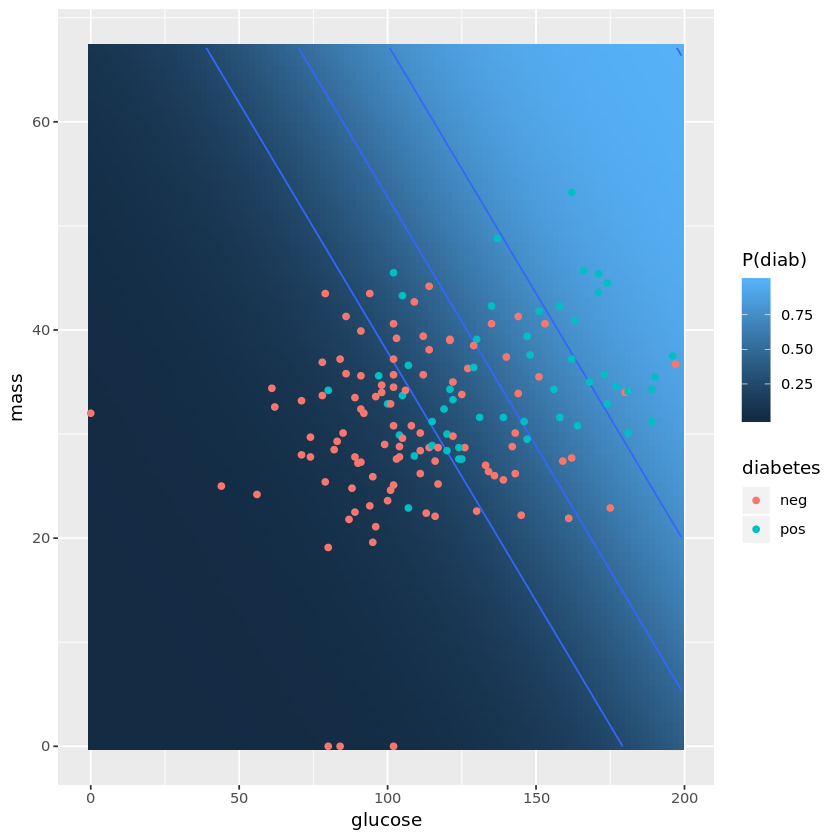

In [10]:
# Create synthetic data
x <- seq(from = 0, to = 199, length.out = 100)
y <- seq(from = 0, to = 67.1, length.out = 100)

synthetic <- with(dataset, data.frame(pregnant = mean(pregnant), 
                                    glucose  = rep(x, 100), 
                                    pressure = mean(pressure), 
                                    triceps  = mean(triceps), 
                                    insulin  = mean(insulin), 
                                    mass     = rep(y, each = 100), 
                                    pedigree = mean(pedigree), 
                                    age      = mean(age)))

# Create the predicted probabilities.
# Type of prediction is a predicted probability (type = response)
synthetic$diabetesP <- predict(logitMod, newdata = synthetic, type = "response")

# plot the predicted probabilities
ggplot(synthetic, aes(x = glucose, y = mass, z = diabetesP)) +
         stat_contour(geom = "polygon", aes(fill = ..level..))  +
         geom_tile(aes(fill = diabetesP)) +
         stat_contour(bins = 4) +
         guides(fill = guide_colorbar(title = "P(diab)")) +

         geom_point(data = validation, aes(x = glucose, y = mass, color = diabetes))